In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Simple spam dataset
emails = [
    "Win a free prize",
    "Congratulations you won",
    "Earn money fast",
    "Meeting at 3pm",
    "Here is the report",
    "Let's schedule a call"
]

labels = [1, 1, 1, 0, 0, 0]   # 1 = spam, 0 = not spam

df = pd.DataFrame({"Email": emails, "Label": labels})
df

,Email,Label
0,Win a free prize,1
1,Congratulations you won,1
2,Earn money fast,1
3,Meeting at 3pm,0
4,Here is the report,0
5,Let's schedule a call,0


In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Email"])
y = df["Label"]

In [11]:
model = LogisticRegression()
model.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


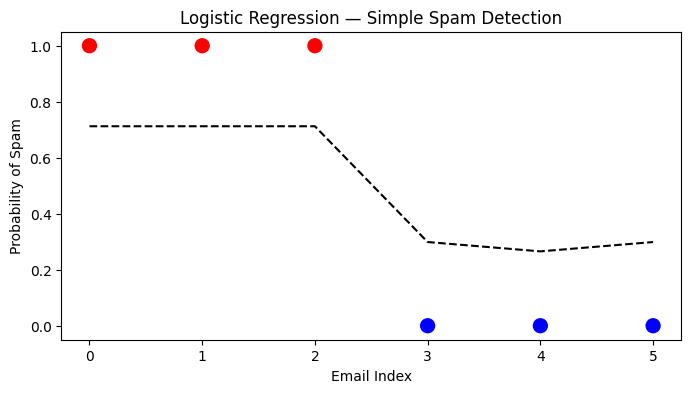

In [14]:
spam_prob = model.predict_proba(X)[:, 1]

plt.figure(figsize=(8,4))
plt.scatter(range(len(emails)), y, c=y, cmap='bwr', s=100)
plt.plot(range(len(emails)), spam_prob, 'k--')

plt.title("Logistic Regression — Simple Spam Detection")
plt.xlabel("Email Index")
plt.ylabel("Probability of Spam")
plt.show()

In [16]:
new_email = ["shall we have a meeting"]
new_vec = vectorizer.transform(new_email)

result = model.predict(new_vec)[0]
print("Spam" if result == 1 else "Not Spam")


Not Spam
